<a href="https://colab.research.google.com/github/kernelphan/ML-DL-Project/blob/main/Prediction%20of%20Course%20Selection%20Behavior%20of%20Information%20Technology%20Students%20at%20IUH%20University.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

B√†i t·∫≠p th∆∞·ªùng k·ª≥ 2. D·ª± ƒëo√°n nh√£n cho b√¨nh lu·∫≠n

Import data

In [ ]:
pip install transformers torch

In [ ]:
!pip install wordcloud

In [ ]:
!pip install underthesea

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 20.9/20.9 MB 41.5 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 657.8/657.8 kB 28.9 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1.2/1.2 MB 18.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re
import string
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
import torch
from torch.utils.data import Dataset
import re
import string

from underthesea import word_tokenize, text_normalize


import os
os.environ["WANDB_DISABLED"] = "true"

In [ ]:

file_path = '/content/drive/MyDrive/DEEP LEARNING/BaiTapThuongKy2/data_final.xlsx'
data = pd.read_excel(file_path)

Show data ban ƒë·∫ßu

In [ ]:
data.head()

Unnamed: 0                                           old_data  label
0           0  Shop giao s·∫£n ph·∫©m ƒë√£ qua s·ª≠ d·ª•ng , kh√¥ng h√†i ...      0
1           1  ƒê√≥ng g√≥i c·∫©n th·∫≠n, sp m·ªõi v√† nh·ªè g·ªçn. R·∫•t h√†i ...      4
2           2             S·∫£n ph·∫©m nh·ªè g·ªçn, giao h√†ng r·∫•t nhanh.      1
3           3                s·∫£n ph·∫©m r·∫•t chu·∫©n so vs qu·∫£ng c√°o.      1
4           4                                         Nh·ªè g·ªçn g√™      1

Drop c·ªôt STT

In [ ]:
# Dropping the first column (index column) by referencing its name or position
data = data.drop(columns=[data.columns[0]])

# Display the first few rows to confirm
data.head()


old_data  label
0  Shop giao s·∫£n ph·∫©m ƒë√£ qua s·ª≠ d·ª•ng , kh√¥ng h√†i ...      0
1  ƒê√≥ng g√≥i c·∫©n th·∫≠n, sp m·ªõi v√† nh·ªè g·ªçn. R·∫•t h√†i ...      4
2             S·∫£n ph·∫©m nh·ªè g·ªçn, giao h√†ng r·∫•t nhanh.      1
3                s·∫£n ph·∫©m r·∫•t chu·∫©n so vs qu·∫£ng c√°o.      1
4                                         Nh·ªè g·ªçn g√™      1

s·ªë l∆∞·ª£ng cmt theo rate label

In [ ]:

# Count of each sentiment label
label_counts = data['label'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
label_counts.plot(kind='bar')
plt.title('Comment Sentiment Distribution')
plt.xlabel('Sentiment Label')
plt.ylabel('Number of Comments')
plt.show()


T·ª∑ l·ªá c·ªßa c√°c rate label

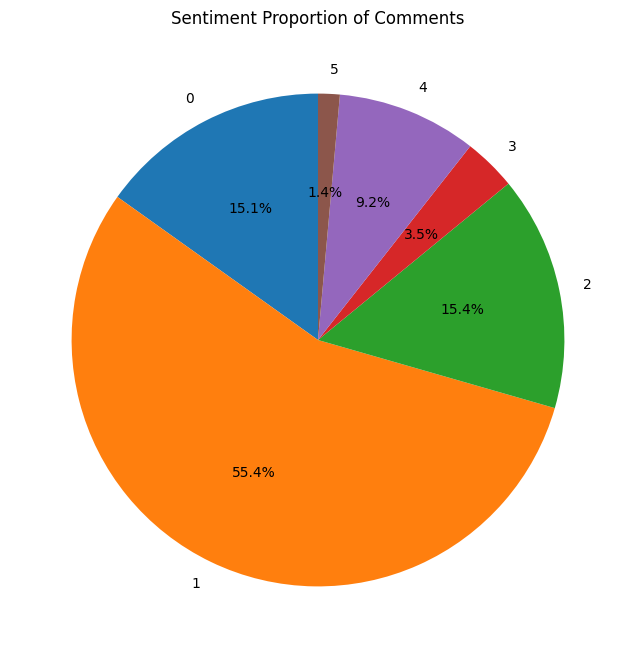

In [ ]:
plt.figure(figsize=(8, 8))
label_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Sentiment Proportion of Comments')
plt.ylabel('')
plt.show()


In [ ]:


# Ensure 'label' column contains 6 unique labels
unique_labels = sorted(data['label'].unique())[:6]  # Sorting and taking the first 6 if more are present

# Set up the figure for displaying multiple word clouds
plt.figure(figsize=(15, 15))
for i, label in enumerate(unique_labels, 1):
    # Filter comments for the current label
    comments = ' '.join(data[data['label'] == label]['old_data'].astype(str))
    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(comments)

    # Plot each word cloud
    plt.subplot(3, 2, i)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Label {label}')
    plt.axis('off')

plt.tight_layout()
plt.show()


Remove .....

In [ ]:


# Gi·∫£ s·ª≠ 'old_data' l√† c·ªôt ch·ª©a b√¨nh lu·∫≠n trong DataFrame data
# X√≥a nh·ªØng c√¢u c√≥ nhi·ªÅu d·∫•u ch·∫•m li√™n ti·∫øp
data = data[~data['old_data'].str.contains(r'\.{3,}', na=False)]

# Ki·ªÉm tra l·∫°i k·∫øt qu·∫£
data.head()


old_data  label
0  Shop giao s·∫£n ph·∫©m ƒë√£ qua s·ª≠ d·ª•ng , kh√¥ng h√†i ...      0
1  ƒê√≥ng g√≥i c·∫©n th·∫≠n, sp m·ªõi v√† nh·ªè g·ªçn. R·∫•t h√†i ...      4
2             S·∫£n ph·∫©m nh·ªè g·ªçn, giao h√†ng r·∫•t nhanh.      1
3                s·∫£n ph·∫©m r·∫•t chu·∫©n so vs qu·∫£ng c√°o.      1
4                                         Nh·ªè g·ªçn g√™      1

Remove stop words, convert to lowercase

In [ ]:
# List of common Vietnamese stop words
vietnamese_stop_words = [
    "v√†", "l√†", "c·ªßa", "c√≥", "m·ªôt", "nh·ªØng", "c√°c", "ƒë∆∞·ª£c", "trong", "v·ªõi",
    "cho", "ƒë√£", "n√†y", "n√™n", "ra", "v·ªÅ", "th√¨", "l√†m", "kh√¥ng", "t·∫°i",
    "nh∆∞", "l·∫°i", "nh∆∞ng", "ƒë√≥", "ƒë·ªÉ", "c≈©ng", "theo", "n·∫øu", "khi", "qua",
    "r·∫±ng", "ƒëi", "sau", "h∆°n", "nhi·ªÅu", "r·∫•t", "g√¨", "ƒëang", "c√πng", "b·ªüi"
]

def remove_vietnamese_stop_words(text):
    # Convert to lowercase
    text = text.lower()

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    # Remove Vietnamese stop words
    words = text.split()
    words = [word for word in words if word not in vietnamese_stop_words]

    # Join words back into one string
    cleaned_text = ' '.join(words)

    return cleaned_text

# Apply this to the 'old_data' column
data['old_data'] = data['old_data'].astype(str).apply(remove_vietnamese_stop_words)

# Display the first few rows to verify the results
data.head()


old_data  label
0       shop giao s·∫£n ph·∫©m s·ª≠ d·ª•ng h√†i l√≤ng s·∫£n ph·∫©m      0
1  ƒë√≥ng g√≥i c·∫©n th·∫≠n sp m·ªõi nh·ªè g·ªçn h√†i l√≤ng c√°m ...      4
2                   s·∫£n ph·∫©m nh·ªè g·ªçn giao h√†ng nhanh      1
3                     s·∫£n ph·∫©m chu·∫©n so vs qu·∫£ng c√°o      1
4                                         nh·ªè g·ªçn g√™      1

remove emoji, repeat char

In [ ]:
emoji_pattern = re.compile("["
                u"\U0001F600-\U0001F64F"
                u"\U0001F300-\U0001F5FF"
                u"\U0001F680-\U0001F6FF"
                u"\U0001F1E0-\U0001F1FF"
                u"\U00002702-\U000027B0"
                u"\U000024C2-\U0001F251"
                u"\U0001f926-\U0001f937"
                u'\U00010000-\U0010ffff'
                u"\u200d"
                u"\u2640-\u2642"
                u"\u2600-\u2B55"
                u"\u23cf"
                u"\u23e9"
                u"\u231a"
                u"\u3030"
                u"\ufe0f"
    "]+", flags=re.UNICODE) # Unicode emojis.

def clean_text(text):

    text = re.sub(emoji_pattern, " ", text) # remove emojis

    text = re.sub(r'([a-z]+?)\1+',r'\1', text) # reduce repeated character (e.g. 'aaabbb' -> 'ab')

    # Ensure space before and after any punctuation mark
    text = re.sub(r"(\w)\s*([" + string.punctuation + "])\s*(\w)", r"\1 \2 \3", text)
    text = re.sub(r"(\w)\s*([" + string.punctuation + "])", r"\1 \2", text)

    text = re.sub(f"([{string.punctuation}])([{string.punctuation}])+",r"\1", text) # reduce consecutive punctuation

    # X√≥a m·ªçi d·∫•u c√°ch ·ªü ƒë·∫ßu ho·∫∑c cu·ªëi ho·∫∑c d·∫•u ch·∫•m c√¢u ·ªü ƒë·∫ßu ho·∫∑c cu·ªëi kh·ªèi vƒÉn b·∫£n
    text = text.strip()
    while text.endswith(tuple(string.punctuation+string.whitespace)):
        text = text[:-1]
    while text.startswith(tuple(string.punctuation+string.whitespace)):
        text = text[1:]

    text = text.translate(str.maketrans('', '', string.punctuation)) # remove all punctuation

    text = re.sub(r"\s+", " ", text) # reduce multiple spaces

    text = text_normalize(text) # make sure punctunation is in the right letter (Vietnamese case)
    text = word_tokenize(text, format="text") # tokenize the cleaned text
    # text = unidecode(text) # remove accent marks from sentences (no significant difference when accent marks is removed or kept)

    '''
    Proper tokenization allows models or algorithms to understand the semantics of the text better.
    For instance, `"ƒëi ch∆°i" (go play)` should be treated as one unit
    instead of two separate words "ƒëi" (go) and "ch∆°i" (play) for proper semantic understanding.
    '''
    return text

# Apply this to the 'old_data' column
data['old_data'] = data['old_data'].apply(clean_text)

# Display the first few rows to verify the results
data.head()

old_data  label
0       shop giao s·∫£n_ph·∫©m s·ª≠_d·ª•ng h√†i_l√≤ng s·∫£n_ph·∫©m      0
1  ƒë√≥ng_g√≥i c·∫©n_th·∫≠n sp m·ªõi nh·ªè g·ªçn h√†i_l√≤ng c√°m_...      4
2                   s·∫£n_ph·∫©m nh·ªè g·ªçn giao h√†ng nhanh      1
3                     s·∫£n_ph·∫©m chu·∫©n so vs qu·∫£ng_c√°o      1
4                                         nh·ªè g·ªçn g√™      1

teen code

In [ ]:

# T·∫°o t·ª´ ƒëi·ªÉn teen code ph·ªï bi·∫øn
teen_code_dict = {
    'k0': 'kh√¥ng', 'hok': 'kh√¥ng', 'ko': 'kh√¥ng', 'kh': 'kh√¥ng', 'k': 'kh√¥ng',
    'dc': 'ƒë∆∞·ª£c', 'j': 'g√¨', 'ck': 'ch·ªìng', 'vk': 'v·ª£', 'mk': 'm√¨nh',
    'mjk': 'm√¨nh', 'u': 'you', 'iu': 'y√™u', 'z': 'd', 'vs': 'v·ªõi',
    'ntn': 'nh∆∞ th·∫ø n√†o', 'ahihi': 'haha', 'vl': 'v√£i', 'bt': 'b√¨nh th∆∞·ªùng',
    'cc':'t·ªá', 'g√™':'gh√™','sp':'s·∫£n ph·∫©m'

}

def convert_teen_code(text):
    # T√°ch c√°c t·ª´ trong vƒÉn b·∫£n
    words = text.split()
    # Thay th·∫ø c√°c t·ª´ teen code b·∫±ng t·ª´ chu·∫©n
    converted_words = [teen_code_dict.get(word, word) for word in words]
    # Gh√©p l·∫°i th√†nh c√¢u ƒë√£ chuy·ªÉn ƒë·ªïi
    return ' '.join(converted_words)


data['old_data'] = data['old_data'].apply(convert_teen_code)

# Hi·ªÉn th·ªã k·∫øt qu·∫£
data.head()


old_data  label
0       shop giao s·∫£n_ph·∫©m s·ª≠_d·ª•ng h√†i_l√≤ng s·∫£n_ph·∫©m      0
1  ƒë√≥ng_g√≥i c·∫©n_th·∫≠n s·∫£n ph·∫©m m·ªõi nh·ªè g·ªçn h√†i_l√≤n...      4
2                   s·∫£n_ph·∫©m nh·ªè g·ªçn giao h√†ng nhanh      1
3                    s·∫£n_ph·∫©m chu·∫©n so v·ªõi qu·∫£ng_c√°o      1
4                                        nh·ªè g·ªçn gh√™      1

In [ ]:
# data.to_excel('/content/drive/MyDrive/DEEP LEARNING/BaiTapThuongKy2/processed_data.xlsx', index=False)
# !cp '/content/processed_data.xlsx' '/content/drive/MyDrive/'
hienthi=pd.read_excel('/content/drive/MyDrive/DEEP LEARNING/BaiTapThuongKy2/processed_data.xlsx')
hienthi.head()

old_data  label
0       shop giao s·∫£n_ph·∫©m s·ª≠_d·ª•ng h√†i_l√≤ng s·∫£n_ph·∫©m      0
1  ƒë√≥ng_g√≥i c·∫©n_th·∫≠n s·∫£n ph·∫©m m·ªõi nh·ªè g·ªçn h√†i_l√≤n...      4
2                   s·∫£n_ph·∫©m nh·ªè g·ªçn giao h√†ng nhanh      1
3                    s·∫£n_ph·∫©m chu·∫©n so v·ªõi qu·∫£ng_c√°o      1
4                                        nh·ªè g·ªçn gh√™      1

Chia data ra tap train, valid, test theo t·ª´ng label

In [ ]:
from sklearn.model_selection import train_test_split

# Gi·∫£ s·ª≠ c·ªôt 'label' ch·ª©a c√°c nh√£n v√† c·ªôt 'old_data' ch·ª©a vƒÉn b·∫£n
texts = data['old_data'].tolist()
labels = data['label'].tolist()

# B∆∞·ªõc 1: Chia d·ªØ li·ªáu th√†nh 70% hu·∫•n luy·ªán v√† 30% t·∫°m th·ªùi
train_texts, temp_texts, train_labels, temp_labels = train_test_split(
    texts, labels, test_size=0.3, stratify=labels, random_state=42
)

# B∆∞·ªõc 2: Chia t·∫≠p t·∫°m th·ªùi th√†nh 50% ƒë·ªÉ l·∫•y 15% cho t·∫≠p x√°c th·ª±c v√† 15% cho t·∫≠p ki·ªÉm tra
val_texts, test_texts, val_labels, test_labels = train_test_split(
    temp_texts, temp_labels, test_size=0.5, stratify=temp_labels, random_state=42
)

# Ki·ªÉm tra s·ªë l∆∞·ª£ng m·∫´u trong t·ª´ng t·∫≠p
print("S·ªë l∆∞·ª£ng m·∫´u trong t·∫≠p hu·∫•n luy·ªán:", len(train_texts))
print("S·ªë l∆∞·ª£ng m·∫´u trong t·∫≠p x√°c th·ª±c:", len(val_texts))
print("S·ªë l∆∞·ª£ng m·∫´u trong t·∫≠p ki·ªÉm tra:", len(test_texts))


S·ªë l∆∞·ª£ng m·∫´u trong t·∫≠p hu·∫•n luy·ªán: 18108
S·ªë l∆∞·ª£ng m·∫´u trong t·∫≠p x√°c th·ª±c: 3880
S·ªë l∆∞·ª£ng m·∫´u trong t·∫≠p ki·ªÉm tra: 3881


Ph√¢n ph·ªëi c√°c nh√£n trong train,valid,test

In [ ]:


# Chuy·ªÉn ƒë·ªïi c√°c t·∫≠p th√†nh DataFrame ƒë·ªÉ d·ªÖ ki·ªÉm tra
train_df = pd.DataFrame({'text': train_texts, 'label': train_labels})
val_df = pd.DataFrame({'text': val_texts, 'label': val_labels})
test_df = pd.DataFrame({'text': test_texts, 'label': test_labels})

# Ki·ªÉm tra ph√¢n ph·ªëi nh√£n
print("Ph√¢n ph·ªëi nh√£n trong t·∫≠p hu·∫•n luy·ªán:\n", train_df['label'].value_counts(normalize=True))
print("Ph√¢n ph·ªëi nh√£n trong t·∫≠p x√°c th·ª±c:\n", val_df['label'].value_counts(normalize=True))
print("Ph√¢n ph·ªëi nh√£n trong t·∫≠p ki·ªÉm tra:\n", test_df['label'].value_counts(normalize=True))


Ph√¢n ph·ªëi nh√£n trong t·∫≠p hu·∫•n luy·ªán:
 label
1    0.554016
2    0.154005
0    0.151404
4    0.091787
3    0.034613
5    0.014174
Name: proportion, dtype: float64
Ph√¢n ph·ªëi nh√£n trong t·∫≠p x√°c th·ª±c:
 label
1    0.554124
2    0.153827
0    0.151350
4    0.091652
3    0.034679
5    0.014367
Name: proportion, dtype: float64
Ph√¢n ph·ªëi nh√£n trong t·∫≠p ki·ªÉm tra:
 label
1    0.554124
2    0.154075
0    0.151350
4    0.091900
3    0.034432
5    0.014119
Name: proportion, dtype: float64


In [ ]:



# S·ª≠ d·ª•ng CountVectorizer
count_vectorizer = CountVectorizer(max_features=5000)  # S·ª≠ d·ª•ng t·ªëi ƒëa 5000 t·ª´ ph·ªï bi·∫øn nh·∫•t
X_count = count_vectorizer.fit_transform(data['cleaned_text'])

# S·ª≠ d·ª•ng TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # S·ª≠ d·ª•ng t·ªëi ƒëa 5000 t·ª´ ph·ªï bi·∫øn nh·∫•t
X_tfidf = tfidf_vectorizer.fit_transform(data['cleaned_text'])

# Ki·ªÉm tra k·∫øt qu·∫£
print("D·∫°ng CountVectorizer:")
print(X_count.toarray())
print("D·∫°ng TfidfVectorizer:")
print(X_tfidf.toarray())


D·∫°ng CountVectorizer:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
D·∫°ng TfidfVectorizer:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# B∆∞·ªõc 1: Chu·∫©n b·ªã d·ªØ li·ªáu
X = data['old_data']  # D·ªØ li·ªáu ƒë·∫ßu v√†o l√† c√°c b√¨nh lu·∫≠n
y = data['label']     # Nh√£n ƒë·∫ßu ra

# Chia d·ªØ li·ªáu th√†nh t·∫≠p hu·∫•n luy·ªán v√† t·∫≠p ki·ªÉm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# B∆∞·ªõc 2: X·ª≠ l√Ω vƒÉn b·∫£n
vectorizer = TfidfVectorizer(max_features=5000)  # S·ª≠ d·ª•ng t·ªëi ƒëa 5000 t·ª´
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# B∆∞·ªõc 3: Hu·∫•n luy·ªán m√¥ h√¨nh
model = LogisticRegression()
model.fit(X_train_vec, y_train)

# B∆∞·ªõc 4: D·ª± ƒëo√°n v√† ƒë√°nh gi√°
y_pred = model.predict(X_test_vec)

# ƒê√°nh gi√° hi·ªáu qu·∫£ c·ªßa m√¥ h√¨nh
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


T·∫£i tokenizer v√† m√¥ h√¨nh PhoBERT

In [ ]:

# Load PhoBERT tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("vinai/phobert-base")
model = AutoModelForSequenceClassification.from_pretrained("vinai/phobert-base", num_labels=len(set(train_labels)))

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/557 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/895k [00:00<?, ?B/s]

bpe.codes:   0%|          | 0.00/1.14M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


pytorch_model.bin:   0%|          | 0.00/543M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at vinai/phobert-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Tokenize d·ªØ li·ªáu
train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=128)
val_encodings = tokenizer(val_texts, truncation=True, padding=True, max_length=128)

# T·∫°o Dataset class ƒë·ªÉ ƒë∆∞a v√†o DataLoader
class TextDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

# T·∫°o dataset cho t·∫≠p hu·∫•n luy·ªán v√† t·∫≠p validation
train_dataset = TextDataset(train_encodings, train_labels)
val_dataset = TextDataset(val_encodings, val_labels)


In [ ]:
# Thi·∫øt l·∫≠p tham s·ªë hu·∫•n luy·ªán
training_args = TrainingArguments(
    output_dir='./results',          # Th∆∞ m·ª•c l∆∞u k·∫øt qu·∫£
    num_train_epochs=5,              # S·ªë l∆∞·ª£ng epoch
    per_device_train_batch_size=4,   # Batch size cho hu·∫•n luy·ªán
    per_device_eval_batch_size=4,    # Batch size cho ki·ªÉm tra
    warmup_steps=500,                # S·ªë b∆∞·ªõc warmup
    weight_decay=0.01,               # Tr·ªçng s·ªë weight decay
    logging_dir='./logs',            # Th∆∞ m·ª•c l∆∞u logs
    logging_steps=10,
    evaluation_strategy="epoch"      # Ki·ªÉm tra sau m·ªói epoch
)

# Kh·ªüi t·∫°o Trainer
trainer = Trainer(
    model=model,                         # M√¥ h√¨nh PhoBERT
    args=training_args,                  # Tham s·ªë hu·∫•n luy·ªán
    train_dataset=train_dataset,         # T·∫≠p hu·∫•n luy·ªán
    eval_dataset=val_dataset             # T·∫≠p ki·ªÉm tra
)

# Hu·∫•n luy·ªán m√¥ h√¨nh
trainer.train()
history = trainer.state.log_history

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


In [ ]:
# L·∫•y c√°c gi√° tr·ªã loss v√† eval_loss
train_loss = [log["loss"] for log in history if "loss" in log]
eval_loss = [log["eval_loss"] for log in history if "eval_loss" in log]
epochs = list(range(1, len(eval_loss) + 1))
# V·∫Ω ƒë·ªì th·ªã loss c·ªßa train v√† validation
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_loss[:len(eval_loss)], label='Train Loss')
plt.plot(epochs, eval_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


In [ ]:
test_encodings = tokenizer(test_texts, truncation=True, padding=True, max_length=128, return_tensors="pt")


In [ ]:
# ƒê·∫£m b·∫£o m√¥ h√¨nh ·ªü ch·∫ø ƒë·ªô ƒë√°nh gi√°
model.eval()

# Di chuy·ªÉn model ƒë·∫øn GPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)

# Chia test_encodings th√†nh c√°c batch nh·ªè h∆°n
batch_size = 32 # Adjust this value as needed
num_batches = len(test_encodings['input_ids']) // batch_size + (len(test_encodings['input_ids']) % batch_size > 0)

predictions = []
for i in range(num_batches):
    start_idx = i * batch_size
    end_idx = min((i + 1) * batch_size, len(test_encodings['input_ids']))

    batch_encodings = {k: v[start_idx:end_idx].to(device) for k, v in test_encodings.items()}

    # D·ª± ƒëo√°n
    with torch.no_grad():
        outputs = model(**batch_encodings)
        batch_predictions = torch.argmax(outputs.logits, dim=1).tolist()
        predictions.extend(batch_predictions)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# T√≠nh accuracy
accuracy = accuracy_score(test_labels, predictions)
print("Accuracy:", accuracy)

# B√°o c√°o chi ti·∫øt
print("Classification Report:\n", classification_report(test_labels, predictions))


Accuracy: 0.6985313063643391
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.69      0.68       571
           1       0.82      0.83      0.83      2169
           2       0.49      0.48      0.48       593
           3       0.39      0.34      0.36       136
           4       0.46      0.50      0.48       357
           5       0.33      0.13      0.18        55

    accuracy                           0.70      3881
   macro avg       0.53      0.49      0.50      3881
weighted avg       0.69      0.70      0.70      3881



In [ ]:
!cp -r /content/ '/content/drive/MyDrive/DEEP LEARNING/BaiTapThuongKy2'


cp: cannot create directory '/content/drive/MyDrive/DEEP LEARNING/BaiTapThuongKy2/content/drive/.Encrypted/MyDrive/DEEP LEARNING/BaiTapThuongKy2/content/drive/.Encrypted/MyDrive/DEEP LEARNING/BaiTapThuongKy2/content/drive/.Encrypted/MyDrive/DEEP LEARNING/BaiTapThuongKy2/content/drive/.Encrypted/MyDrive/DEEP LEARNING/BaiTapThuongKy2/content/drive/.Encrypted/MyDrive/DEEP LEARNING/BaiTapThuongKy2/content/drive/.Encrypted/MyDrive/DEEP LEARNING/BaiTapThuongKy2/content/drive/.Encrypted/MyDrive/DEEP LEARNING/BaiTapThuongKy2/content/drive/.Encrypted/MyDrive/DEEP LEARNING/BaiTapThuongKy2/content/drive/.Encrypted/MyDrive/DEEP LEARNING/BaiTapThuongKy2/content/drive/.Encrypted/MyDrive/DEEP LEARNING/BaiTapThuongKy2/content/drive/.Encrypted/MyDrive/DEEP LEARNING/BaiTapThuongKy2/content/drive/.Encrypted/MyDrive/DEEP LEARNING/BaiTapThuongKy2/content/drive/.Encrypted/MyDrive/DEEP LEARNING/BaiTapThuongKy2/content/drive/.Encrypted/MyDrive/DEEP LEARNING/BaiTapThuongKy2/content/drive/.Encrypted/MyDrive/DEE